# Project -  A good online game to play
**Problem Statement -** 
> Finding out which game is better based on Count of Players and Positive Reviews using Steam Dataset.

**Dataset -** 
> We are planning to use the [Games on Steam](https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022) Dataset. It contains useful information, such as the products genre, tags, categories, languages and other information. Most importantly, it includes the number of positive and negative reviews on a product.





**Approach -** 
> Given that there are many games with similar graphics and visuals, it becomes imperative to know which game has a better fanbase in the given genre. Thus, we decided to come up with an approach that designs a model based on "Player Count" and "Positive Reviews" to shortlist the game that has an edge over the rest. For this, we are using XGBoost Algorithm that provides faster and accurate computation in a Gradient Boosting Framework.

**Hypothesis -** 
> We will use XGBoost for our project as it is a tree-based Machine learning algorithm that uses a gradient boosting framework and will provide us with better results. We can evaluate the performance of our model with the evaluation metric r2. The closer the value of r2 is to 1, it shows how well the model has performed.

**Why Bother?**
> Understanding the functioning of XGBoost Algorithm and doing some analysis on the Game Dataset gave us the insights of using a similar approach in various distinct domains of the real world. 
For instance, Sales Volume Prediction. We can use XGBoost with GridSearch. The Idea of Forecasting the Sales of a product can be clearly computed and analyzed using Gradient Boosting Regressor.

## Basic Setup

Pandas, SciKitLearn, Numpy, XGBoost and MatPlotLib

Imports are necessary to analyze the given dataset thus before loading the dataset, we define the libraries that we're going to use. 


1.   Pandas - Allows to understand and split the data into frames for efficient processing.
2.   SciKitLearn - Allows the usage of Standard ML Algorithms.
3. Numpy - Computing comprehensive Mathematical Functions like Linear Algebra, Fourier Transform.
4. XGBoost - The main Algorithm on which we plan to train and test our model.
5. MatPlotLib - Interactive and Creative Visualizations of our Analysis.




In [ ]:
import pandas as pd
import numpy as np
from numpy import absolute
from pandas import read_csv
from numpy import asarray
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import io

## The Data
We're using Kaggle's [Games on Steam](https://www.kaggle.com/datasets/tristan581/all-55000-games-on-steam-november-2022) Dataset as it contains the store page data of all 55691 games on the online PC gaming store Steam. 

These records require a lot of pre-processing and cleaning before we can train them on our model.

We'll go through the pre-processing stages in greater detail ahead.

In [ ]:
# To run the project yourself you need to download the dataset from kaggle and then upload it here.
uploaded = files.upload()

Saving steam_games.csv to steam_games.csv


In [ ]:
dataset = pd.read_csv(('/content/steam_games.csv'), sep=";")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,Header Image
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,000,000 .. 20,000,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","""Shoot Em Up"": 186, Metroidvania: 181, Bullet ...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,999880,NASA's Exoplanet Excursions,Take VR journeys through the amazing TRAPPIST-...,"Caltech/IPAC, NASA's Jet Propulsion Laboratory","Caltech/IPAC, NASA's Jet Propulsion Laboratory",Education,"Education: 22, VR: 6, Space: 5",game,NaN,"0 .. 20,000",...,0,0,0,0,English,windows,2019/04/18,0,http://www.spitzer.caltech.edu/vr,https://cdn.akamai.steamstatic.com/steam/apps/...
55687,999890,Bruken,"Explore a large spherical world, enjoying all ...",FlairBot Games,FlairBot Games,"Adventure, Casual, Indie","Casual: 21, Indie: 21, Adventure: 20",game,Single-player,"0 .. 20,000",...,299,299,0,0,English,windows,2019/04/11,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
55688,999900,Studio by RADiCAL,"RADiCAL Studio is a real-time, unlimited motio...",RADiCAL,"RADiCAL Solutions, LLC",Animation & Modeling,"Animation & Modeling: 25, 3D: 13",game,NaN,"20,000 .. 50,000",...,0,0,0,0,English,windows,2019/01/4,0,https://getrad.co,https://cdn.akamai.steamstatic.com/steam/apps/...
55689,999930,Fantasy Sino-Japanese War 幻想甲午,You unfortunately passed through the Sino-Japa...,张八万工作室,张八万工作室,"Indie, RPG, Strategy, Early Access","Early Access: 21, Indie: 20, RPG: 20, Strategy...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,499,499,0,0,"English, Simplified Chinese, Traditional Chinese",windows,2019/01/11,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


## Pre-Processing


Based on the output we see that:
1. Lot of bad values in Website column - We need to drop this column
2. Bad values of Short Description field can be replaced with 'Game'
3. Developer field - We need to put "Unknown"
4. Same for publisher, Genre, Category and Language.
5. For Tag field - we make it " "
6. Release date and Required Age - To be seen if it is really needed after PCA

In [ ]:
dataset.isna().sum()

App ID                   0
Name                     0
Short Description       37
Developer              129
Publisher              151
Genre                  161
Tags                   135
Type                     0
Categories             970
Owners                   0
Positive Reviews         0
Negative Reviews         0
Price                    0
Initial Price            0
Discount                 0
CCU                      0
Languages               11
Platforms                0
Release Date            99
Required Age             0
Website              25217
Header Image             0
dtype: int64

**Cleaning of the Dataset**

We drop some features that aren't required for our problem.

In [ ]:
dataset.drop('Website', axis=1, inplace=True)
dataset.drop('Header Image', axis=1, inplace=True)
dataset.drop('App ID', axis=1, inplace=True)
dataset.drop('Required Age', axis=1, inplace=True)

We fill in the missing values with the defaults.

In [ ]:
dataset["Short Description"].fillna("Game", inplace=True)
dataset["Categories"].fillna("Game", inplace=True)
dataset["Publisher"].fillna("Unknown", inplace=True)
dataset["Developer"].fillna("Unkown", inplace=True)
dataset["Tags"].fillna("", inplace=True)
dataset["Genre"].fillna("Unknown", inplace=True)
dataset["Release Date"].fillna("1980/01/01", inplace=True)
dataset["Languages"].fillna("Unknown", inplace=True)

In [ ]:
dataset.isna().sum()  # number of missing values in the dataset

Name                 0
Short Description    0
Developer            0
Publisher            0
Genre                0
Tags                 0
Type                 0
Categories           0
Owners               0
Positive Reviews     0
Negative Reviews     0
Price                0
Initial Price        0
Discount             0
CCU                  0
Languages            0
Platforms            0
Release Date         0
dtype: int64

In [ ]:
dataset.describe()

,Positive Reviews,Negative Reviews,Price,Initial Price,Discount,CCU
count,5.569100e+04,55691.000000,55691.000000,55691.000000,55691.000000,55691.000000
mean,1.470876e+03,241.837694,773.284983,797.566303,2.603778,138.959616
std,3.098273e+04,5765.413762,1093.134583,1104.762478,12.887080,6002.067909
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000e+00,1.000000,134.000000,199.000000,0.000000,0.000000
50%,1.900000e+01,6.000000,499.000000,499.000000,0.000000,0.000000
75%,1.060000e+02,32.000000,999.000000,999.000000,0.000000,1.000000
max,5.943345e+06,908515.000000,99900.000000,99900.000000,90.000000,874053.000000


Now the dataset is cleaned and has no missing or garbage values. All the unnecessary columns have been dropped and default values are set for the missing fields. 

The next stage is to look and understand the data. Thus we add a sample plot to see how various trends interract with eachother and what features marginally influence the dataset. 

Using MatPlotLib, we can get a better hang of the numerical data.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:156: UserWarning: The handle <matplotlib.patches.Patch object at 0x7fce79c7a510> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self._figure.legend(handles, labels, **kwargs)


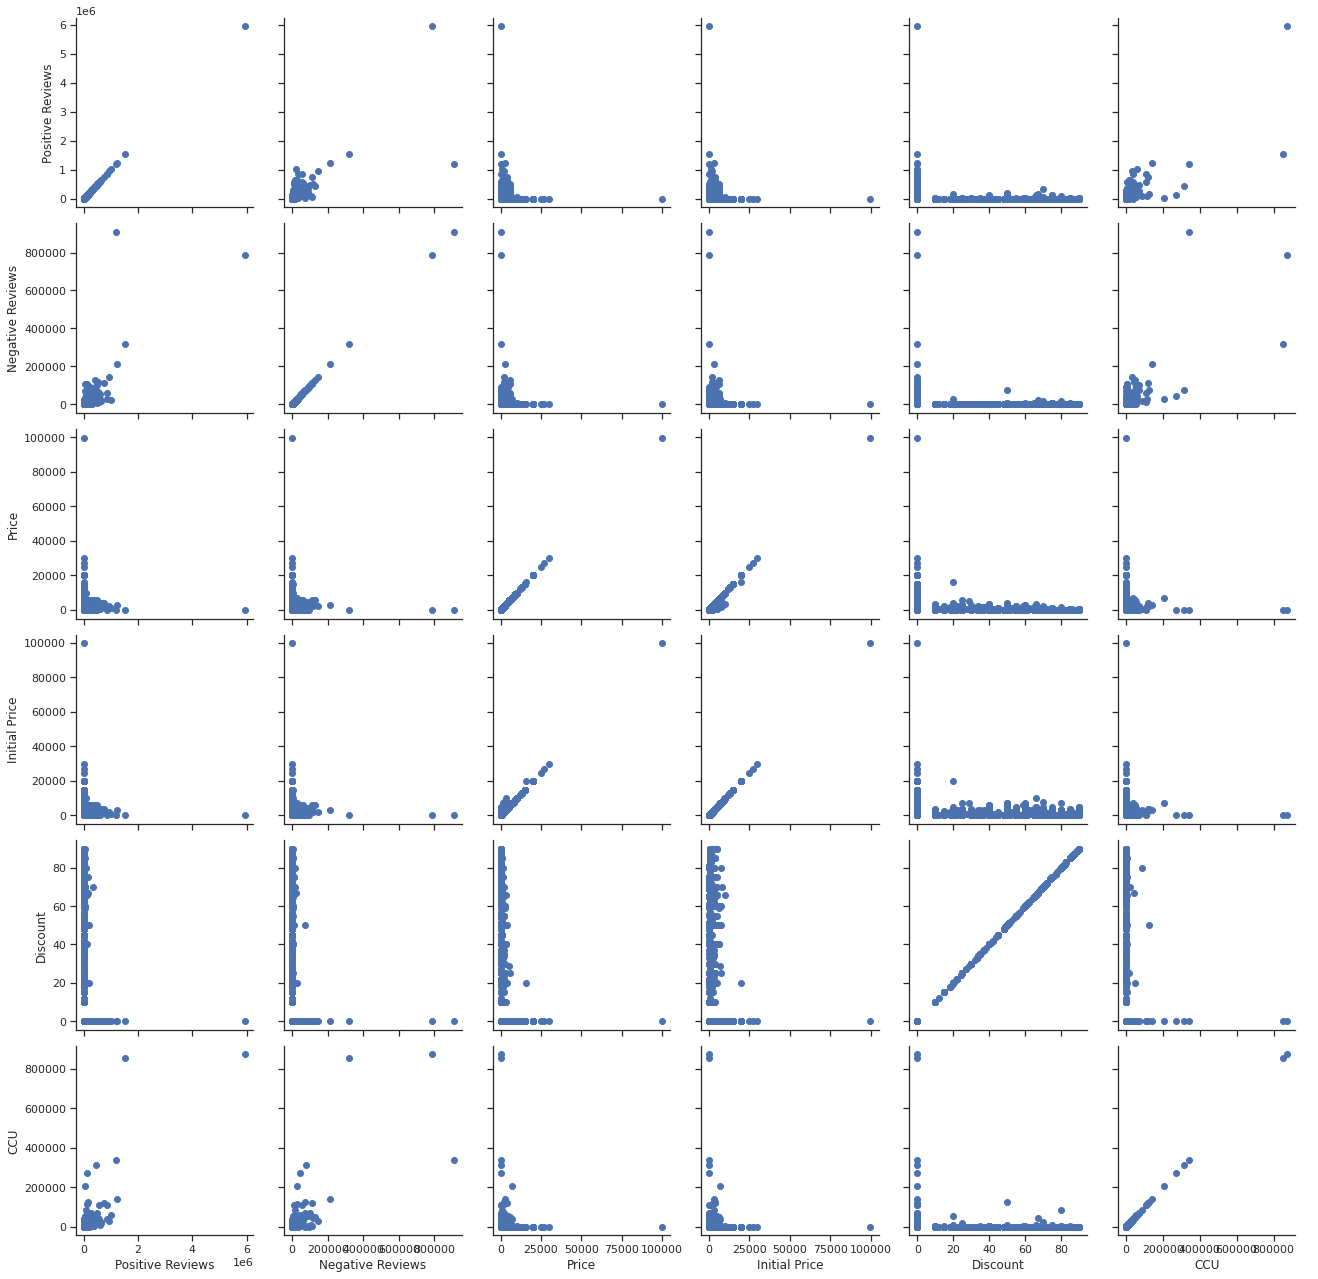

In [ ]:
sns.set(style="ticks")
#sns.set_palette(sns.color_palette("husl", 8))
g = sns.PairGrid(data=dataset, height=3)
g = g.map(plt.scatter)
g = g.add_legend()

On a closer glance at the plots, one understands that the features **Price** and **Initial Price** have similar influence on feature vectors. Thus it becomes redundant to use both the features at the same time. Thus we decide to drop **Initial Price** Column from the dataset.

In [ ]:
dataset.drop('Initial Price', axis=1, inplace=True)

**Standardization of feature values**

On describing the dataset, we understand that the names, range, description are all alphanumeric. Thus we convert them to integers for uniformity of datatypes.

In [ ]:
encoder = LabelEncoder()
for item in dataset:
    dataset[item] = encoder.fit_transform(dataset[item])
dataset

Name
Short Description
Developer
Publisher
Genre
Tags
Type
Categories
Owners
Positive Reviews
Negative Reviews
Price
Discount
CCU
Languages
Platforms
Release Date


,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Positive Reviews,Negative Reviews,Price,Discount,CCU,Languages,Platforms,Release Date
0,9730,34577,30243,25987,5,8703,0,3977,2,4477,1863,237,0,1030,391,6,7
1,1162,5643,13508,19381,253,116,0,4408,0,27,5,237,0,0,6385,3,3450
2,10134,17482,19133,24186,926,43471,0,4428,7,2623,637,177,45,99,8564,3,3234
3,9530,13368,30374,26103,679,51195,0,2155,3,1450,115,307,0,76,18,5,3232
4,55119,55236,7973,6830,488,3505,0,4017,0,0,1,80,0,0,8548,3,2654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,30027,41634,4791,4182,1367,27599,0,17,0,12,3,0,0,0,18,3,2672
55687,6678,18629,9948,8504,788,18258,0,4017,0,2,0,109,0,0,18,3,2665
55688,42828,35678,22790,19649,976,16251,0,17,5,12,19,0,0,0,18,3,2596
55689,16215,53042,34278,29541,1550,26186,0,4455,0,2,2,155,0,0,7719,3,2573


Once the datatypes are uniform, we plan to dial down the range of the values to have a common scale. For this we use the following function on all the columns.

```
minmax_scale()
```



In [ ]:
cols = dataset.select_dtypes(np.number).columns
dataset[cols] = minmax_scale(dataset[cols])
dataset

,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,Positive Reviews,Negative Reviews,Price,Discount,CCU,Languages,Platforms,Release Date
0,0.175540,0.624912,0.869802,0.867332,0.002731,0.165102,0.0,0.807185,0.166667,0.988737,0.838057,0.617188,0.000000,0.926259,0.045349,1.000000,0.001746
1,0.020964,0.101986,0.388496,0.646853,0.138176,0.002201,0.0,0.894662,0.000000,0.005963,0.002249,0.617188,0.000000,0.000000,0.740547,0.500000,0.860349
2,0.182828,0.315953,0.550273,0.807222,0.505735,0.824673,0.0,0.898721,0.583333,0.579284,0.286550,0.460938,0.714286,0.089029,0.993273,0.500000,0.806484
3,0.171932,0.241601,0.873569,0.871204,0.370836,0.971203,0.0,0.437386,0.250000,0.320230,0.051732,0.799479,0.000000,0.068345,0.002088,0.833333,0.805985
4,0.994407,0.998283,0.229307,0.227955,0.266521,0.066492,0.0,0.815303,0.000000,0.000000,0.000450,0.208333,0.000000,0.000000,0.991417,0.500000,0.661845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55686,0.541720,0.752453,0.137791,0.139577,0.746587,0.523571,0.0,0.003450,0.000000,0.002650,0.001350,0.000000,0.000000,0.000000,0.002088,0.500000,0.666334
55687,0.120478,0.336683,0.286109,0.283826,0.430366,0.346366,0.0,0.815303,0.000000,0.000442,0.000000,0.283854,0.000000,0.000000,0.002088,0.500000,0.664589
55688,0.772664,0.644810,0.655450,0.655797,0.533042,0.308292,0.0,0.003450,0.416667,0.002650,0.008547,0.000000,0.000000,0.000000,0.002088,0.500000,0.647382
55689,0.292536,0.958631,0.985850,0.985949,0.846532,0.496766,0.0,0.904201,0.000000,0.000442,0.000900,0.403646,0.000000,0.000000,0.895268,0.500000,0.641646


## Training the Machine Learning Model
In order to **train** the machine learning model to predict the value of  the required fields, we first have to give it some training data. It will start to learn on its own from those examples. Then, in order to **test** how well the model has trained itself, we have to give it some new data it has never seen, ask it to make it's best guess (or *prediction*), and then check if it got it right. These are called *train* versus *test* data.

What we will do is first tell the XGBoost model what features to learn. Then we tell model to learn and predict the values from 10 splits of the original dataset and repeat the whole process 3 times over. So that we get a distribution of how well the model has learnt. Some folks like to use 70-30 split. It really just depends on how much data and time one has. The main thing is to want to make sure that there is enough data for training (hundreds or millions), and enough for testing (at least 50).

**Prediction 1** -  Total Number of Concurrent Online Players

First order of business is to understand how many players play the game. Usually a good indicator of whether a game is worth playing or not is by getting the total online player base of the game.

In [ ]:
feature_list = []
for feature in dataset:
  if feature != "CCU":
    feature_list.append(feature)
features = dataset[feature_list]
label = dataset["CCU"]
model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_rmse = cross_val_score(model, features, label, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores_r2 = cross_val_score(model, features, label, scoring='r2', cv=cv, n_jobs=-1)
scores_mse = cross_val_score(model, features, label, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae = cross_val_score(model, features, label, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

**Prediction 2** - Number of positive reviews

Second order of business is to get the general sentiment of the playerbase in terms of the number of positive reviews a game has. This usually indicates how well the game was made and its capacity to attract loyal players.

In [ ]:
feature_list = []
for feature in dataset:
  if feature != "Positive Reviews":
    feature_list.append(feature)
features = dataset[feature_list]
label = dataset["Positive Reviews"]
model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores_rmse_pos_revs = cross_val_score(model, features, label, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)
scores_r2_pos_revs = cross_val_score(model, features, label, scoring='r2', cv=cv, n_jobs=-1)
scores_mse_pos_revs = cross_val_score(model, features, label, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores_mae_pos_revs = cross_val_score(model, features, label, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

## Visualization

Here we plot the scores of R2, RMSE and MAE on an error bar and see the goodness of our preditions


**Visualization 1** - Total Player base prediction

R2 score  :  0.74944974 (SD: 0.03051378)
RMSE score:  47.45552944 (SD: 3.06095703)
MSE score : 2261.39673279 (SD: 294.70152173)
MAE score :  10.84413939 (SD: 0.77146373)


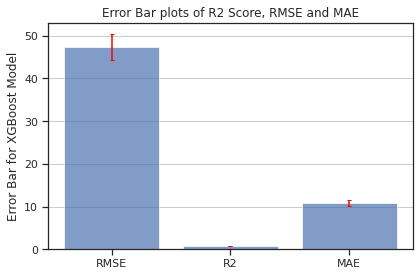

In [ ]:
scores_rmse = absolute(scores_rmse)
scores_mse = absolute(scores_mse)
scores_r2 = absolute(scores_r2)
scores_mae = absolute(scores_mae)

#Define the plot
labels = ['RMSE', 'R2', 'MAE']
x_pos = np.arange(len(labels))
CTEs = [absolute(scores_rmse.mean()), absolute(scores_r2.mean()), absolute(scores_mae.mean())]
error = [absolute(scores_rmse.std()), absolute(scores_r2.std()), absolute(scores_mae.std())]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.7,
       ecolor='red',
       capsize=2)
ax.set_ylabel('Error Bar for XGBoost Model')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error Bar plots of R2 Score, RMSE and MAE')
ax.yaxis.grid(True)

#Print metric values
print('R2 score  :  %.8f (SD: %.8f)' % (scores_r2.mean(), scores_r2.std()) )
print('RMSE score:  %.8f (SD: %.8f)' % (scores_rmse.mean(), scores_rmse.std()) )
print('MSE score : %.8f (SD: %.8f)' % (scores_mse.mean(), scores_mse.std()) )
print('MAE score :  %.8f (SD: %.8f)' % (scores_mae.mean(), scores_mae.std()) )

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

**Visualization 2** - Sentiment Analysis of the game

R2 score  :  0.90241870 (SD: 0.00613117)
RMSE score:  233.67934457 (SD: 8.23123473)
MSE score : 54673.78930416 (SD: 3828.39253314)
MAE score :  96.68478337 (SD: 2.77220996)


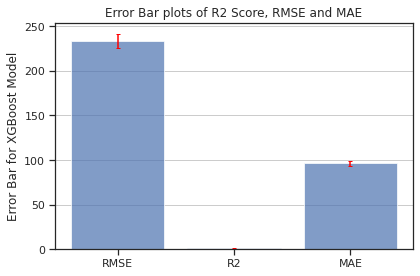

In [ ]:
scores_rmse_pos_revs = absolute(scores_rmse_pos_revs)
scores_mse_pos_revs = absolute(scores_mse_pos_revs)
scores_r2_pos_revs = absolute(scores_r2_pos_revs)
scores_mae_pos_revs = absolute(scores_mae_pos_revs)

#Define the plot
labels = ['RMSE', 'R2', 'MAE']
x_pos = np.arange(len(labels))
CTEs = [absolute(scores_rmse_pos_revs.mean()), absolute(scores_r2_pos_revs.mean()), absolute(scores_mae_pos_revs.mean())]
error = [absolute(scores_rmse_pos_revs.std()), absolute(scores_r2_pos_revs.std()), absolute(scores_mae_pos_revs.std())]
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs,
       yerr=error,
       align='center',
       alpha=0.7,
       ecolor='red',
       capsize=2)
ax.set_ylabel('Error Bar for XGBoost Model')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Error Bar plots of R2 Score, RMSE and MAE')
ax.yaxis.grid(True)

#Print metric values
print('R2 score  :  %.8f (SD: %.8f)' % (scores_r2_pos_revs.mean(), scores_r2_pos_revs.std()) )
print('RMSE score:  %.8f (SD: %.8f)' % (scores_rmse_pos_revs.mean(), scores_rmse_pos_revs.std()) )
print('MSE score : %.8f (SD: %.8f)' % (scores_mse_pos_revs.mean(), scores_mse_pos_revs.std()) )
print('MAE score :  %.8f (SD: %.8f)' % (scores_mae_pos_revs.mean(), scores_mae_pos_revs.std()) )

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

## Single Train and Test Instance
The X and Y below stand for two things: X = data, Y = label (in our case, CCU and Positive Reviews). The reason for calling them X and Y is we are trying to learn a function, Y = f(X), that will basically tell us, based on the data in X, what value of CCU or Positive reviews should it predict?

Notice how, when we inspect the training data, the records are jumbled. That's because we told it to randomly select a 70:30 split on the data. So it jumbles the rows and then picks them out into the training and testing sets. Everytime you run this code, it will randomly jumble and re-select. So the data will change each time, which means the results may vary a bit.

Prediction for total number of positive reviews for the game

In [ ]:
new_feature_list = []
for feature in dataset:
  if feature != "Positive Reviews":
    new_feature_list.append(feature)
features = dataset[new_feature_list]
label = dataset["Positive Reviews"]
train_X, test_X, train_y, test_y = train_test_split(features, label,
                      test_size = 0.3, random_state = 123)

xgb_r = XGBRegressor()
 
# Fitting the model
xgb_r.fit(train_X, train_y)
 
# Predict the model
pred = xgb_r.predict(test_X)
#  RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

print("Actual")
arr = []
res = []
count = 50
for item in test_y:
    if count > 0:
        arr.append(item)
    count-=1
arr.sort(reverse=True)
print (arr)

print("\nPredicted")
count = 50
for item in pred:
    if count > 0:
        res.append(item)
    count-=1
res.sort(reverse=True)
print (res)

[22:26:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  226.350290
Actual
[3211, 1982, 590, 570, 482, 467, 420, 417, 343, 194, 184, 119, 67, 49, 39, 38, 37, 27, 27, 26, 25, 24, 23, 20, 20, 17, 14, 13, 12, 10, 10, 8, 6, 6, 6, 6, 5, 5, 5, 4, 3, 3, 2, 1, 1, 1, 1, 1, 1, 0]

Predicted
[3287.8699, 1472.8562, 589.7241, 498.72543, 413.12436, 382.67288, 344.5408, 311.8814, 226.75328, 182.56824, 176.40363, 152.92705, 136.56946, 125.476, 81.09214, 77.60166, 66.36303, 58.4128, 52.067253, 40.076668, 34.280045, 32.764503, 29.569633, 22.736109, 21.864996, 19.901255, 19.279928, 18.85564, 17.622099, 16.899916, 13.037605, 12.950926, 11.151246, 11.151246, 10.772603, 10.068224, 8.590353, 8.580667, 8.396472, 8.396472, 6.4733677, 3.5221744, 2.1556382, 1.951741, 1.951741, 0.5236493, -4.116682, -14.967378, -31.292086, -31.596989]


Predicion for total online players for the game

In [ ]:
new_feature_list = []
for feature in dataset:
  if feature != "CCU":
    new_feature_list.append(feature)
features = dataset[new_feature_list]
label = dataset["CCU"]
train_X, test_X, train_y, test_y = train_test_split(features, label,
                      test_size = 0.3, random_state = 123)

xgb_r = XGBRegressor()
 
# Fitting the model
xgb_r.fit(train_X, train_y)
 
# Predict the model
pred = xgb_r.predict(test_X)
#  RMSE Computation
rmse = np.sqrt(MSE(test_y, pred))
print("RMSE : % f" %(rmse))

[22:26:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  49.334160


## Conclusion

Through this example we have the accumen to predict the total number of online players and positive reviews a game might get upon its launch on steam. Both being key identifiers for a game that is worth playing. 

So in essence we have started our path to build a model that performs **"Good Game"** detection for game developers looking to launch their game on steam. This will give them an estimate of how many players they can expect and how well it will be recieved online. These insights would give developers a key insight in to hopefully correct and tune their games to better suit the needs of the market at that time.